In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("startup_funding.csv")

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df.tail()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
3039,3040,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,3041,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,3042,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,3043,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN


In [6]:
df.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [7]:
df.dtypes

Sr No                 int64
Date dd/mm/yyyy      object
Startup Name         object
Industry Vertical    object
SubVertical          object
City  Location       object
Investors Name       object
InvestmentnType      object
Amount in USD        object
Remarks              object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [9]:
df.describe()

,Sr No
count,3044.000000
mean,1522.500000
std,878.871435
min,1.000000
25%,761.750000
50%,1522.500000
75%,2283.250000
max,3044.000000


In [10]:
df.shape

(3044, 10)

In [11]:
df.drop(columns=['Sr No', 'Remarks'], inplace=True)

In [12]:
df.columns

Index(['Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical', 'SubVertical',
       'City  Location', 'Investors Name', 'InvestmentnType', 'Amount in USD'],
      dtype='object')

In [13]:
df.rename(columns={
    'Date dd/mm/yyyy': 'date',
    'Startup Name': 'startups',
    'Industry Vertical': 'vertical',
    'SubVertical': 'subvertical',
    'City  Location': 'location',
    'Investors Name': 'investor',
    'Amount in USD': 'amount',
    'InvestmentnType': 'investment round'
}, inplace=True)

In [15]:
df.columns

Index(['date', 'startups', 'vertical', 'subvertical', 'location', 'investor',
       'investment round', 'amount'],
      dtype='object')

In [16]:
df.isnull().sum()

date                  0
startups              0
vertical            171
subvertical         936
location            180
investor             24
investment round      4
amount              960
dtype: int64

In [17]:
df.duplicated().sum()

0

In [18]:
df.columns

Index(['date', 'startups', 'vertical', 'subvertical', 'location', 'investor',
       'investment round', 'amount'],
      dtype='object')

In [19]:
df['amount'] = df['amount'].fillna('0')

In [20]:
df['amount'].unique()

array(['20,00,00,000', '80,48,394', '1,83,58,860', '30,00,000',
       '18,00,000', '90,00,000', '15,00,00,000', '60,00,000',
       '7,00,00,000', '5,00,00,000', '2,00,00,000', '1,20,00,000',
       '3,00,00,000', '59,00,000', '20,00,000', '23,10,00,000',
       '4,86,000', '15,00,000', 'undisclosed', '2,60,00,000',
       '1,74,11,265', '13,00,000', '13,50,00,000', '3,00,000',
       '22,00,00,000', '1,58,00,000', '28,30,00,000', '1,00,00,00,000',
       '4,50,00,000', '58,50,00,000', 'unknown', '45,00,000', '33,00,000',
       '50,00,000', '1,80,00,000', '10,00,000', '1,00,00,000',
       '45,00,00,000', '16,00,000', '14,00,00,000', '3,80,80,000',
       '12,50,00,000', '1,10,00,000', '5,10,00,000', '3,70,00,000',
       '5,00,000', '11,00,00,000', '1,50,00,000', '65,90,000',
       'Undisclosed', '3,90,00,00,000', '1,90,00,000', '25,00,000',
       '1,45,000', '6,00,00,000', '1,60,00,000', '57,50,000', '3,19,605',
       '48,89,975.54', '7,50,00,000', '27,39,034.68', '1,51,09,500.0

In [21]:
df['amount'] = df['amount'].str.replace(',', '')
df['amount'] = df['amount'].str.replace('undisclosed', '0')
df['amount'] = df['amount'].str.replace('unknown', '0')
df['amount'] = df['amount'].str.replace('Undisclosed', '0')

In [22]:
df = df[df['amount'].str.isdigit()]

In [23]:
df['amount'] = df['amount'].astype('float64')

In [24]:
df.dtypes

date                 object
startups             object
vertical             object
subvertical          object
location             object
investor             object
investment round     object
amount              float64
dtype: object

In [25]:
df['amount']

0       200000000.0
1         8048394.0
2        18358860.0
3         3000000.0
4         1800000.0
           ...     
3039      4500000.0
3040       825000.0
3041      1500000.0
3042            0.0
3043       140000.0
Name: amount, Length: 3029, dtype: float64

In [26]:
df['date'] = df['date'].str.replace('05/072018', '05/07/2018')
df['date'] = df['date'].str.replace('15-01-07 00:00:00', '15/01/07')

In [27]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [28]:
df.dropna(subset=['date', 'location', 'subvertical', 'vertical', 'investor', 'investment round'], inplace=True)

In [29]:
df.isnull().sum()

date                0
startups            0
vertical            0
subvertical         0
location            0
investor            0
investment round    0
amount              0
dtype: int64

In [30]:
df

,date,startups,vertical,subvertical,location,investor,investment round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
6,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0
...,...,...,...,...,...,...,...,...
2035,2016-11-01,Fashionablyin,Consumer Internet,Mobile based Geo-target Fashion Marketplace,Mumbai,Ranjan Mahtani,Seed Funding,0.0
2036,2016-12-01,Shopclues,ECommerce,ECommerce Marketplace,Gurgaon,"GIC, Tiger Global Management, Nexus Venture Pa...",Private Equity,100000000.0
2037,2016-12-01,Hike Messenger,Consumer Internet,P2P Messaging Service,New Delhi,"Matt Mullenweg, Adam D\\xe2\\x80\\x99Angelo, A...",Private Equity,0.0
2038,2016-12-01,iBus Networks,Technology,Next Generation in-building connectivity,Bangalore,"Vallabh Bhanshali, N Squared Management LLC, J...",Private Equity,2300000.0


In [31]:
funding_overview = df.groupby('startups')['amount'].sum()

In [32]:
funding_overview = funding_overview[funding_overview > 0]

In [33]:
top_10_Funding_rais = funding_overview.sort_values(ascending=False).head(10)

In [34]:
top_10_Funding_rais = pd.DataFrame(top_10_Funding_rais)

In [35]:
top_10_Funding_rais = top_10_Funding_rais.reset_index()

In [36]:
top_10_Funding_rais

,startups,amount
0,Flipkart,2.500000e+09
1,Udaan,8.100000e+08
2,GOQii,4.500000e+08
3,Ola,4.345000e+08
4,Zomato,3.500000e+08
5,BigBasket,3.000000e+08
6,OYO Rooms,2.500000e+08
7,Zilingo,2.340000e+08
8,Paytm Marketplace,2.000000e+08
9,CarDekho,2.000000e+08


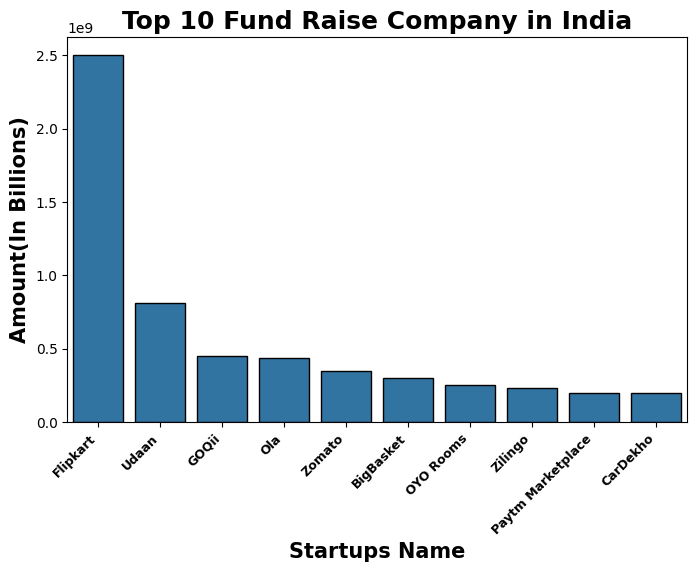

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(x='startups', y='amount', data=top_10_Funding_rais, edgecolor='black')
plt.title('Top 10 Fund Raise Company in India', fontsize=18, weight='bold')
plt.xlabel('Startups Name', fontsize=15, weight='bold')
plt.ylabel('Amount(In Billions)', fontsize=15, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9, weight='bold')
plt.show()

In [38]:
df['vertical'].unique()

array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'E-Commerce', 'Aerospace', 'Gaming',
       'Video Games', 'Last Mile Transportation', 'Customer Service',
       'B2B', 'Advertising, Marketing', 'SaaS', 'IoT',
       'Information Technology', 'Consumer Technology',
       'Health and Wellness', 'Accounting', 'Finance', 'Compliance',
       'Transport', 'Artificial Intelligence', 'Food and Beverage',
       'EdTech', 'Tech', 'Health Care', 'Luxury Label',
       'Waste Management Service', 'Deep-Tech', 'Energy', 'Digital Media',
       'Transportation', 'Services', 'Saas', 'Fintech', 'Edtech', 'AI',
       'Ecommerce', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, Ecommerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-

In [39]:
df['vertical'] = df['vertical'].str.replace('E-Commerce', 'E-commerce')
df['vertical'] = df['vertical'].str.replace('Ecommerce', 'E-commerce')
df['vertical'] = df['vertical'].str.replace('ECommerce', 'E-commerce')
df['vertical'] = df['vertical'].str.replace('eCommerce', 'E-commerce')
df['vertical'] = df['vertical'].str.replace('eCommece', 'E-commerce')

In [40]:
E_commerce = df[df['vertical'] == 'E-commerce'][['startups', 'amount']]
E_commerce = E_commerce[E_commerce['amount'] > 0]
Top10_E_commers_company = E_commerce.sort_values(by='amount', ascending=False).head(10)

In [41]:
Top10_E_commers_company = Top10_E_commers_company.groupby('startups')['amount'].sum()

In [42]:
Top5_E_commers_company = pd.DataFrame(Top10_E_commers_company).sort_values(by='amount', ascending=False).head(5).reset_index()

In [43]:
Top5_E_commers_company

,startups,amount
0,Flipkart,2.500000e+09
1,Zilingo,2.260000e+08
2,Paytm Marketplace,2.000000e+08
3,Meesho,1.750000e+08
4,Shopclues,1.000000e+08


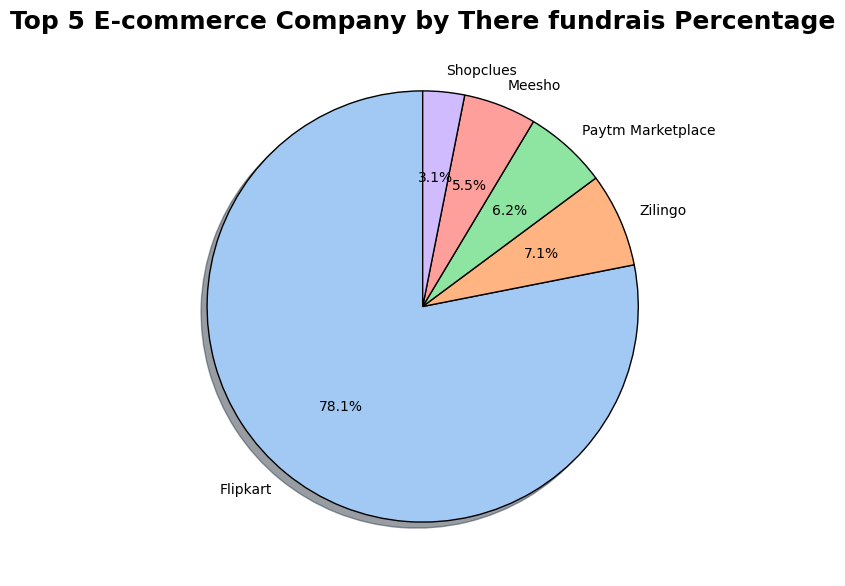

In [44]:
plt.figure(figsize=(7, 7))
plt.pie(Top5_E_commers_company['amount'], labels=Top5_E_commers_company['startups'], autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette('pastel'), shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Top 5 E-commerce Company by There fundrais Percentage', fontsize=18, weight='bold')

plt.show()

In [45]:
df['location'].unique()

array(['Bengaluru', 'New Delhi', 'Mumbai', 'Gurgaon', 'Pune', 'Noida',
       'Amritsar', 'Hyderabad', 'Burnsville', 'Menlo Park', 'Singapore',
       'Kormangala', 'Taramani', 'Andheri', 'Chembur', 'Haryana',
       'New York', 'Karnataka', 'Mumbai/Bengaluru', 'Delhi', 'Bhopal',
       'Gurugram', 'India/Singapore', 'Jaipur', 'India/US', 'Chennai',
       'Nagpur', 'Indore', 'New York, Bengaluru', 'Rourkela', 'Srinagar',
       'Bhubneswar', 'Coimbatore', 'Bangalore', 'Faridabad', 'Ahemdabad',
       'Bhubaneswar', 'Ahmedabad', 'Surat', 'Goa', 'Nw Delhi', 'Kolkata',
       'Trivandrum', 'Vadodara', 'Panaji', 'Udupi', 'Kochi',
       'Bangalore/ Bangkok', 'Hubli', 'Kerala', 'US', 'Chandigarh',
       'Siliguri', 'Lucknow', 'Kanpur', 'SFO / Bangalore', 'London',
       'Seattle / Bangalore', 'Pune/Seattle', 'Pune / Dubai',
       'Bangalore / SFO', 'Varanasi'], dtype=object)

In [46]:
df['location'] = df['location'].str.replace('Bengaluru', 'Bangalore')
df['vertical'] = df['vertical'].str.replace('Bengaluru and Gurugram', 'Bangalore')
df['vertical'] = df['vertical'].str.replace('New York, Bengaluru', 'Bangalore')
df['vertical'] = df['vertical'].str.replace('Bangalore/ Bangkok', 'Bangalore')
df['vertical'] = df['vertical'].str.replace('SFO / Bangalore', 'Bangalore')
df['location'] = df['location'].str.replace('Seattle / Bangalore', 'Bangalore')
df['vertical'] = df['vertical'].str.replace('Bangalore / SFO', 'Bangalore')
df['vertical']=df['vertical'].str.replace('Mumbai/Bengaluru','Mumbai')
df['vertical']=df['vertical'].str.replace('Mumbai / UK','Mumbai')
df['vertical']=df['vertical'].str.replace('New Delhi / US','New Delhi')
df['vertical']=df['vertical'].str.replace('Pune / Dubai','Pune')
df['vertical']=df['vertical'].str.replace('Pune/Seattle','Pune')

In [47]:
Top_5_startupsfriendly_locations = df.groupby('location')['startups'].size().reset_index(name='num_startups').sort_values(by='num_startups', ascending=False).head(5)

In [48]:
Top_5_startupsfriendly_locations

,location,num_startups
4,Bangalore,256
36,Mumbai,172
39,New Delhi,119
18,Gurgaon,85
45,Pune,40


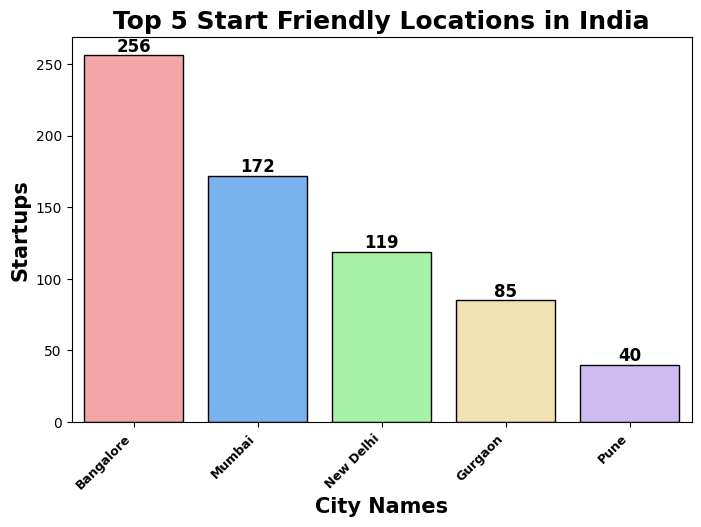

In [50]:
plt.figure(figsize=(8, 5))
sns.barplot(x='location', y='num_startups', data=Top_5_startupsfriendly_locations, palette=
           ['#FF9999', '#66B2FF', '#99FF99', '#fbe7aa', '#cdb2f8'], edgecolor='black')
plt.title('Top 5 Start Friendly Locations in India', fontsize=18, weight='bold')
plt.xlabel('City Names', fontsize=15, weight='bold')
plt.ylabel('Startups', fontsize=15, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=9, weight='bold')

for i in range(len(Top_5_startupsfriendly_locations)):
    plt.text(i, Top_5_startupsfriendly_locations['num_startups'].iloc[i],
            f"{Top_5_startupsfriendly_locations['num_startups'].iloc[i]:,}",
            ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.show()

In [52]:
df['investor'] = df['investor'].str.replace('Softbank', 'SoftBank Group')

In [53]:
Top_5_startupinvestor_inIndia = df.groupby('investor')['amount'].sum().reset_index().sort_values(by='amount', ascending=False).head(5)

In [54]:
Top_5_startupinvestor_inIndia

,investor,amount
622,SoftBank Group,2.500000e+09
45,"Altimeter Capital, DST Global",5.850000e+08
104,Bennett Coleman and Company Ltd (BCCL),4.500000e+08
623,SoftBank Group Corp,3.300000e+08
40,"Alibaba, Helion Venture Partners, Bessemer Ven...",3.000000e+08


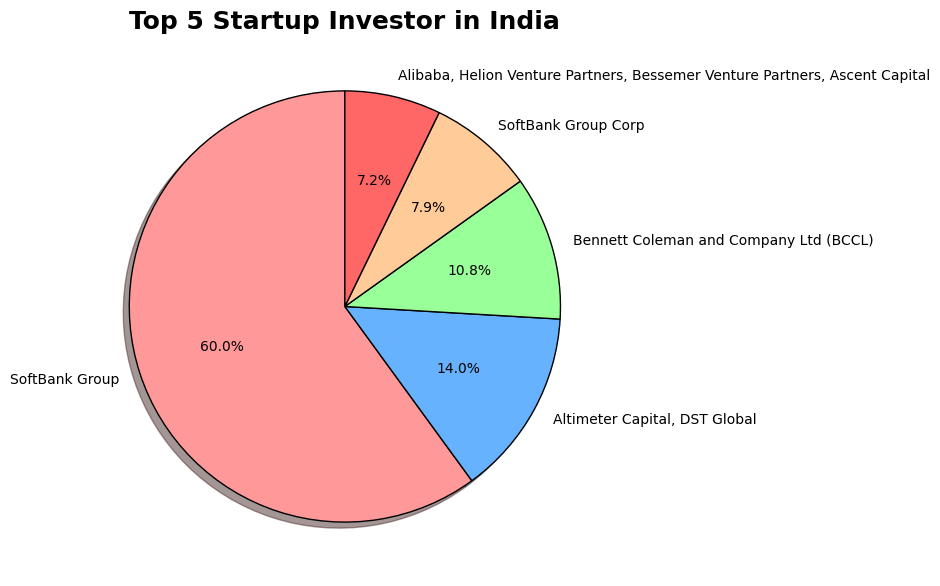

In [55]:
plt.figure(figsize=(7, 7))
plt.pie(Top_5_startupinvestor_inIndia['amount'], labels=Top_5_startupinvestor_inIndia['investor'], autopct='%1.1f%%', startangle=90,
       colors=['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FF6666'], shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Top 5 Startup Investor in India', fontsize=18, weight='bold')

plt.show()

In [56]:
flipkart_history = df[df['startups'] == 'Flipkart'][['investor', 'amount']]

In [57]:
flipkart_history

,investor,amount
651,SoftBank Group,2.500000e+09


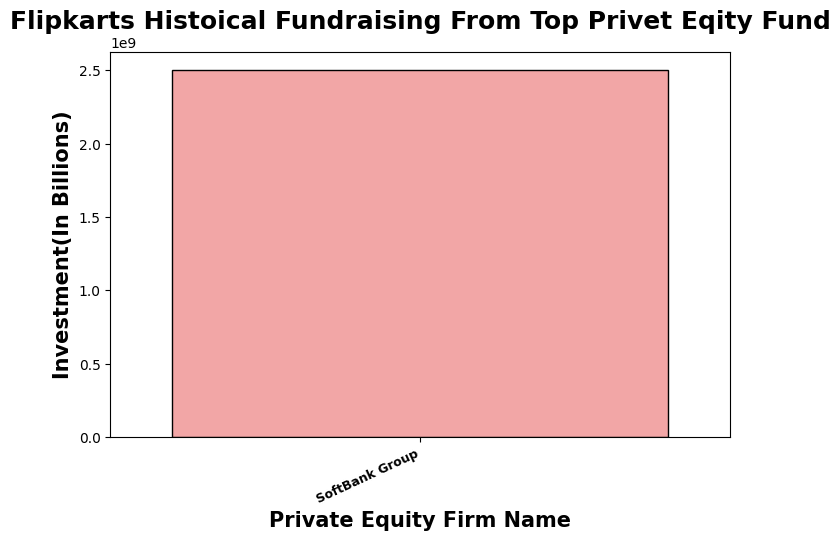

In [61]:
plt.figure(figsize=(8,5))
sns.barplot(x='investor',y='amount',data=flipkart_history,palette= 
            ['#FF9999', '#66B2FF','#fbe7aa','#cdb2f8'],edgecolor='black')
plt.title('Flipkarts Histoical Fundraising From Top Privet Eqity Fund',fontsize=18,weight='bold')
plt.xlabel('Private Equity Firm Name',fontsize=15,weight='bold')
plt.ylabel('Investment(In Billions)',fontsize=15,weight='bold')
plt.xticks(rotation=25,ha='right',fontsize=9,weight='bold')
#plt.grid(color='#e2e2e6')

plt.show()

In [62]:
df['startups'].unique().tolist()

['BYJU’S',
 'Mamaearth',
 'https://www.wealthbucket.in/',
 'Fashor',
 'Zomato',
 'Ecozen',
 'CarDekho',
 'Dhruva Space',
 'Rein Games',
 'SuperGaming',
 'eBikeGo',
 'Dunzo',
 'Udaan',
 'FPL Technologies',
 'Cashflo',
 'Digital F5',
 '3rdFlix',
 '75F',
 'Myelin Foundry',
 'Atomberg Technology',
 'GOQii',
 'Vyapar App',
 'Progcap',
 'Alteria Capital',
 'Pine Labs',
 'Meesho',
 'RenewBuy',
 'Atlan',
 'WizCounsel',
 'Ola Cabs',
 'Uniphore',
 'Daalchini Technologies',
 '"BYJU\\\\\'S"',
 'Moglix',
 'Ezyhaul',
 'Indus OS',
 'HealthAssure',
 'House of Msasaba',
 'Board Infinity',
 'NoBroker',
 'Bira91',
 'Avail Finance',
 'BharatPe',
 'Recykal',
 'Agara Labs',
 'Chakr Innovation',
 'Bolo App',
 'OkCredit',
 'Biz2Credit',
 'Vogo Automotive Pvt. Ltd.',
 'Leegality',
 'Ola Electric',
 'Saahas Zero Waste',
 'StyleDotMe',
 'BlackBuck',
 'Zenoti',
 'Medlife',
 'Kabadiwala',
 'Azah',
 'Setu',
 'Toppr',
 'Craftsvilla',
 'Unacademy',
 'CleverTap',
 'FleetX',
 'Zilingo',
 'Vyome Therapeutics Inc.',
 'Sa

In [63]:
df['startups'] = df['startups'].str.replace('Paytm Marketplace', 'paytm')

In [64]:
Paytm = df[df['startups'] == 'Paytm'][['investor', 'amount']]

In [65]:
Paytm

,investor,amount


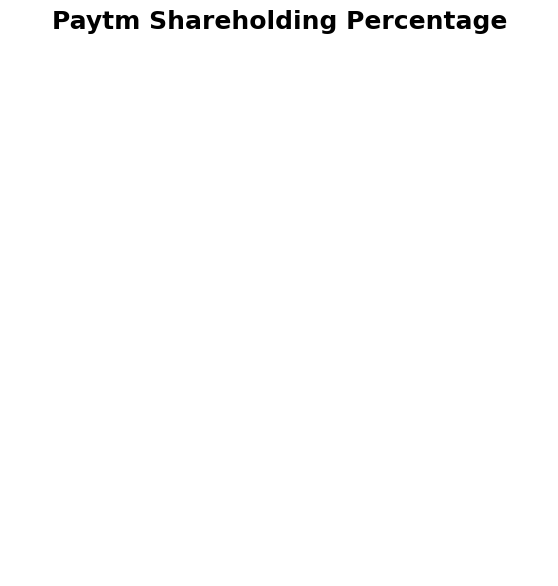

In [66]:
plt.figure(figsize=(7, 7))
plt.pie(Paytm['amount'], labels=Paytm['investor'], autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette('pastel'), shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Paytm Shareholding Percentage', fontsize=18, weight='bold')
plt.show()

In [67]:
df['vertical'].unique()

array(['E-Tech', 'E-commerce', 'FinTech', 'Fashion and Apparel',
       'Hospitality', 'Technology', 'Aerospace', 'Gaming', 'Video Games',
       'Last Mile Transportation', 'Customer Service', 'B2B',
       'Advertising, Marketing', 'SaaS', 'IoT', 'Information Technology',
       'Consumer Technology', 'Health and Wellness', 'Accounting',
       'Finance', 'Compliance', 'Transport', 'Artificial Intelligence',
       'Food and Beverage', 'EdTech', 'Tech', 'Health Care',
       'Luxury Label', 'Waste Management Service', 'Deep-Tech', 'Energy',
       'Digital Media', 'Transportation', 'Services', 'Saas', 'Fintech',
       'Edtech', 'AI', 'Automobile', 'Social Media', 'Services Platform',
       'Travel Tech', 'Online Education', 'Online Marketplace',
       'SaaS, E-commerce', 'NBFC', 'Food', 'Food Tech', 'Fashion',
       'Logistics', 'Real Estate', 'Logistics Tech', 'Consumer Internet',
       'B2B Platform', 'Healthcare', 'Fin-Tech', 'Food-Tech', 'Ed-Tech',
       'IT', 'Fiinance', '

In [68]:
df['vertical']=df['vertical'].str.replace('Health and wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Health and Wellness','healthcare')
df['vertical']=df['vertical'].str.replace('Healthcare','healthcare')
df['vertical']=df['vertical'].str.replace('Health Care','healthcare')

In [70]:
healthcare = df[df['vertical'] == 'healthcare'][['startups', 'amount']]
healthcare = healthcare[healthcare['amount'] > 0]
Top10_Healthcare_company = healthcare.sort_values(by='amount', ascending=False).head(10)

In [71]:
Top10_Healthcare_company

,startups,amount
42,GOQii,450000000.0
358,Shape,100000000.0
856,Healthcare at Home,40000000.0
117,Vyome Therapeutics Inc.,22000000.0
353,Asia Institute Of Medical Science,21000000.0
868,Medwell Ventures,21000000.0
939,iGenetics,19500000.0
360,healthifyme,12000000.0
321,MedGenome,10000000.0
582,OncoStem,6000000.0


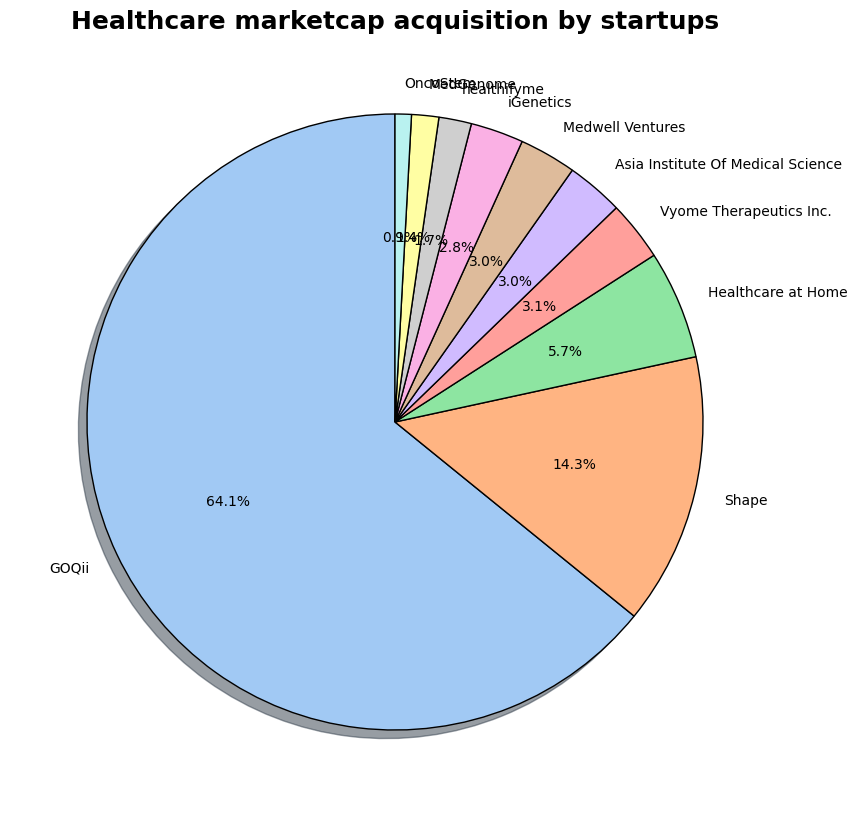

In [73]:
plt.figure(figsize=(10, 10))
plt.pie(Top10_Healthcare_company['amount'], labels=Top10_Healthcare_company['startups'], autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette('pastel'), shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Healthcare marketcap acquisition by startups', fontsize=18, weight='bold')
plt.show()

In [74]:
soft_bank = df[df['investor'] == 'SoftBank Group'][['startups', 'amount']]

In [75]:
soft_bank

,startups,amount
651,Flipkart,2.500000e+09


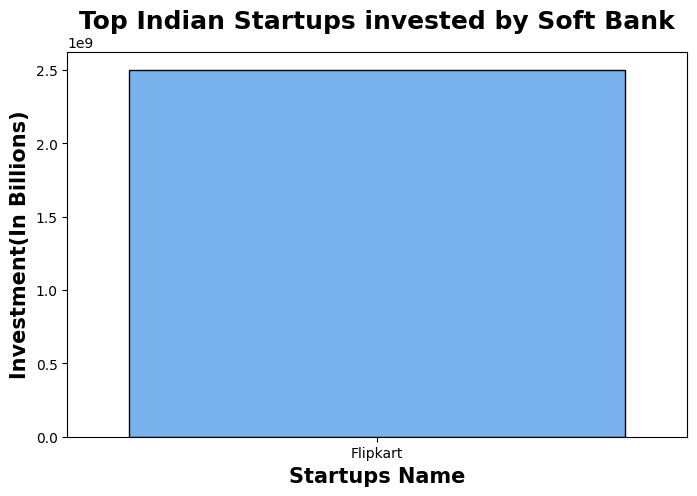

In [76]:
plt.figure(figsize=(8, 5))
sns.barplot(x='startups', y='amount', data=soft_bank, palette=
           ['#66B2FF', '#fbe7aa', '#cdb2f8'], edgecolor='black')
plt.title('Top Indian Startups invested by Soft Bank', fontsize=18, weight='bold')
plt.xlabel('Startups Name', fontsize=15, weight='bold')
plt.ylabel('Investment(In Billions)', fontsize=15, weight='bold')

plt.show()

In [77]:
df.head()

,date,startups,vertical,subvertical,location,investor,investment round,amount
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Equity Round,200000000.0
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,18358860.0
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0
6,2020-10-01,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,150000000.0


In [78]:
investors_interest = df.groupby('vertical')['startups'].size().reset_index(name='num_startups').sort_values(by='num_startups', ascending=False).head(5)

In [79]:
investors_interest

,vertical,num_startups
10,Consumer Internet,365
58,Technology,198
16,E-commerce,131
65,healthcare,36
28,Finance,26


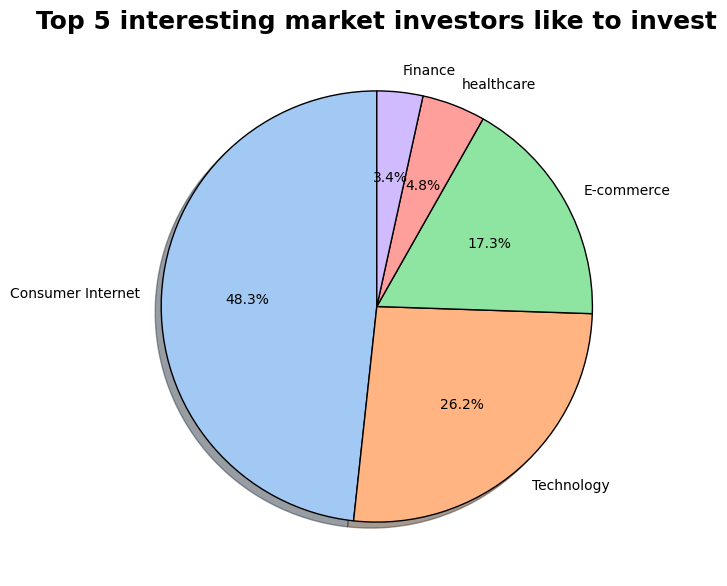

In [82]:
plt.figure(figsize=(7, 7))
plt.pie(investors_interest['num_startups'], labels=investors_interest['vertical'], autopct='%1.1f%%', startangle=90,
       colors=sns.color_palette('pastel'), shadow=True, wedgeprops={'edgecolor': 'black'})

plt.title('Top 5 interesting market investors like to invest', fontsize=18, weight='bold')
plt.show()

In [83]:
df['year'] = df['date'].dt.year

In [84]:
startup_fundrais = df.groupby(['year'])['startups'].count().reset_index()

In [87]:
startup_fundrais

,year,startups
0,2016,397
1,2017,293
2,2018,131
3,2019,65
4,2020,5


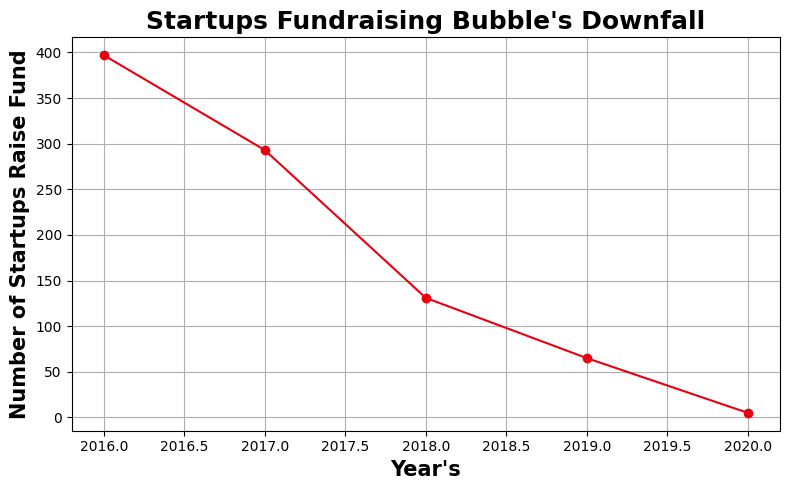

In [89]:
plt.figure(figsize=(8, 5))
plt.plot(startup_fundrais['year'], startup_fundrais['startups'], marker='o', linestyle='-', color='#e9000f')

plt.title("Startups Fundraising Bubble's Downfall", fontsize=18, weight='bold')
plt.xlabel("Year's", fontsize=15, weight='bold')
plt.ylabel('Number of Startups Raise Fund', fontsize=15, weight='bold')

plt.grid(True)
plt.tight_layout()
plt.show()